In [ ]:
#pip install xgboost

# Method for selection of label in first step
we are using histogram of each label for each class in train data to see if they are separated enough to help classification or not. Later we can use quantitive measure like "measuring intersection between histograms" to automate this method.
Selected labels based on our analysis:
'P_2','D_48','D_55', 'D_61', 'B_33', 'B_2', 'D_42','B_22','S_22'


# Assumptions
1- we fill Nan values in data with zero for now.

2- we work on 1000 randomly select data, using 900 for train and 100 for evaluation.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path='/final_1000_full_ID.csv'
# df=pd.read_csv(path)

# df = pd.read_parquet('train_data.parquet')

train_last_dates = pd.read_parquet('train_last_date.parquet')

In [3]:
#labels
path_label='train_labels.csv'
label=pd.read_csv(path_label)

In [4]:
# path='/final_1000_full_ID.csv'
# df_test=pd.read_csv(path)

# df_test = pd.read_parquet('test_data.parquet')

test_last_dates = pd.read_parquet('test_last_date.parquet')

In [5]:
customer_id = train_last_dates['customer_ID'].to_list()
print(len(customer_id))
label_final = label[label['customer_ID'].isin(customer_id)]
print(len(label_final))

458913

458913


## Adding month to the labels

In [6]:
# def add_month(df_sample):
#     df_sample[['year', 'month', 'day']] = df_sample['S_2'].str.split('-', n=-1, expand=True)
#     df_sample = df_sample.drop(['year','day'], axis=1)
#     df_sample['month'] = df_sample['month'].astype(int)
    
#     return df_sample
    
    
# df = add_month(df)
# df_test = add_month(df_test)

In [7]:
# df.head()

In [8]:
# df_test.head()

## Most recent data

In [9]:
# def most_recent_dates(df_sample):
    
#     df_sample['S_2'] = pd.Categorical(df_sample['S_2'], ordered=True)
#     print(df_sample['S_2'].dtypes)
#     group_by_df_train = df_sample.groupby("customer_ID")

#     df_out = df_sample[group_by_df_train["S_2"].transform(pd.Series.rank, ascending=False, method="dense")==1]
#     df_out.reset_index(drop=True, inplace=True)
    
#     return df_out


# train_last_dates = most_recent_dates(df)
# test_last_dates = most_recent_dates(df_test)

In [10]:
train_last_dates.shape

(458913, 191)

In [11]:
test_last_dates.shape

(924621, 190)

# Selecting X_train, y_train, X_test, y_test
it seems that some label doesn't exist in label or duplication

In [12]:
labels_train=[]

for item in train_last_dates.columns:
    if train_last_dates[item].dtype in ['int','float','float32','int32','float64','int64']:
        # if item.startswith('D')==True or item.startswith('B')==True  or item.startswith('S')==True or item.startswith('R')==True or item.startswith('m')==True:
        labels_train.append(item)

labels_train.append('customer_ID')

combined_train=train_last_dates[labels_train].copy()

In [13]:
# combined_df_final=combined_train.set_index('customer_ID').join(label_final.set_index('customer_ID'),on='customer_ID')
combined_df_final = combined_train

# print(combined_df_final.shape)
# print()
# combined_df_final.head()

In [14]:
from sklearn.model_selection import train_test_split

X = combined_df_final.loc[:,(combined_df_final.columns!='target') & (combined_df_final.columns!='customer_ID')]#combined_df_final[['P_2', 'D_42', 'D_48', 'D_55', 'D_61', 'B_33', 'B_2', 'B_22', 'S_22']]
y = combined_df_final.loc[:,combined_df_final.columns=='target'] #combined_df_final['target']
                                        
X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size = .75)

print(X_train_1.shape)
print()
print(list(X_train_1.columns))
print()
print('month' in list(X_train_1))

(344184, 186)



['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2', 'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50', 'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'D_65', 'B_16', 'B_17', 'B_18', 'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73', 'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25', 'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10', 'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13', 'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18', 'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21', 'B_33', 'D_89', 'R_22', 'R_23', 'D_91', 'D_92', 'D_93', 'D_94', 'R_24', 'R_25', 'D_96', '

# Fill Nan by zero in train and test data



In [15]:
X_train_1.fillna(-1,inplace=True)
X_test_1.fillna(-1,inplace=True)

In [16]:
class combine_label:
    def __init__(self,nbins):
        self.nbins=nbins
    def fit(self,label_1,label_2,data):
        #find bins for each label
        self.label_1=label_1
        self.label_2=label_2
        self.bins={label_1:[],label_2:[]}
        initial_list=[item*1.0 for item in range(0,self.nbins)]
        data_1=data[label_1].values
        self.max_1=np.max(data_1)
        self.min_1=np.min(data_1)
        self.bins[label_1]=[self.min_1+item*((self.max_1-self.min_1)/self.nbins) for item in initial_list]
        data_2=data[label_2].values
        self.max_2=np.max(data_2)
        self.min_2=np.min(data_2)
        self.bins[label_2]=[self.min_2+item*((self.max_2-self.min_2)/self.nbins) for item in initial_list]
        combine_label.predict(self,data)
    def predict(self,data):
        label_1=self.label_1
        label_2=self.label_2
        custom_label=label_1+'_'+label_2+'_combined'
        #to avoid nan in single values case, we use 1.01 of max in intever
        f_1=1/(1.001*self.max_1-self.min_1)
        r_1=-self.min_1*f_1
        f_2=1/(1.001*self.max_2-self.min_2)
        r_2=-self.min_2*f_2
        temp_data=data[[label_1,label_2]].copy()
        data[custom_label]=[int((f_1*item_1+r_1)*self.nbins)*(self.nbins+1)+int((f_2*item_2+r_2)*self.nbins) for item_1,item_2 in zip(temp_data[label_1].copy(),temp_data[label_2].copy())]



## Adding std to labels

In [17]:
def add_std_D(df_sample):
    D_label=[]
    for item in labels_train:
        if item.startswith('D') and item.endswith('2Last')==False: D_label.append(item)
    if len(D_label)>0:
        df_sample['std_mean_D_up']=0.5*df_sample[D_label].std(axis=1)+1*df_sample[D_label].mean(axis=1)
        df_sample['count_D_up']=0
        for item in D_label:
                df_sample['count_D_up']=df_sample['count_D_up']+np.float64(df_sample[item]>df_sample['std_mean_D_up'])

        df_sample['std_mean_D_down']=-0.4*df_sample[D_label].std(axis=1)+1*df_sample[D_label].mean(axis=1)
        df_sample['count_D_down']=0
        for item in D_label:
                df_sample['count_D_down']=df_sample['count_D_down']+np.float64(df_sample[item]<df_sample['std_mean_D_down'])
    return df_sample

X_train = add_std_D(X_train_1)
X_test = add_std_D(X_test_1)


labels_train.append('std_mean_D_up')
labels_train.append('count_D_up')
labels_train.append('std_mean_D_down')
labels_train.append('count_D_down')

def add_std_B(df_sample):
    B_label=[]
    for item in labels_train:
        if item.startswith('B') and item.endswith('2Last')==False: B_label.append(item)
    if len(B_label)>0:
        df_sample['std_mean_B_up']=1*df_sample[B_label].std(axis=1)+1*df_sample[B_label].mean(axis=1)
        df_sample['count_B_up']=0
        for item in B_label:
                df_sample['count_B_up']=df_sample['count_B_up']+np.float64(df_sample[item]>df_sample['std_mean_B_up'])

        df_sample['std_mean_B_down']=-0.4*df_sample[B_label].std(axis=1)+1*df_sample[B_label].mean(axis=1)
        df_sample['count_B_down']=0
        for item in B_label:
                df_sample['count_B_down']=df_sample['count_B_down']+np.float64(df_sample[item]<df_sample['std_mean_B_down'])
                
    return df_sample

X_train = add_std_B(X_train_1)
X_test = add_std_B(X_test_1)

labels_train.append('std_mean_B_up')
labels_train.append('count_B_up')
labels_train.append('std_mean_B_down')
labels_train.append('count_B_down')

In [18]:
X_train.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_144,D_145,std_mean_D_up,count_D_up,std_mean_D_down,count_D_down,std_mean_B_up,count_B_up,std_mean_B_down,count_B_down
386386,0.621594,0.033436,0.022157,1.005792,0.002600,0.079296,0.008193,0.006922,-1.0,-1.000000,...,0.005937,0.008715,0.320304,15.0,-0.364819,23.0,0.685690,5.0,-0.103967,4.0
278647,0.685052,0.000552,0.008514,1.007430,0.003424,0.145678,0.002393,0.009127,-1.0,0.194651,...,0.000302,0.006978,0.428232,19.0,-0.319445,22.0,0.677004,6.0,-0.084927,3.0
386681,0.732899,0.505490,0.088434,1.009197,0.005027,0.352238,0.004276,0.009144,-1.0,0.244628,...,0.008574,0.009002,0.313948,18.0,-0.307559,22.0,0.618996,5.0,-0.095523,3.0
90569,0.905532,0.267638,0.035628,1.006216,0.006598,0.104552,0.007042,0.007613,-1.0,0.085936,...,0.002268,0.001906,0.506705,13.0,-0.351654,22.0,0.616559,5.0,-0.140751,4.0
423304,0.719815,0.214887,0.063623,0.233633,0.005400,0.146659,0.008046,0.065359,-1.0,0.053543,...,0.007663,0.008427,0.336066,14.0,-0.469429,29.0,0.652111,2.0,-0.201165,4.0


In [19]:
X_test.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_144,D_145,std_mean_D_up,count_D_up,std_mean_D_down,count_D_down,std_mean_B_up,count_B_up,std_mean_B_down,count_B_down
33412,0.654935,0.003271,0.099197,0.094994,0.006555,0.152290,0.005616,0.117052,-1.000000,-1.000000,...,0.000220,0.004004,0.310276,9.0,-0.414192,24.0,1.078550,1.0,-0.154428,3.0
350485,0.566299,0.505604,0.347895,0.079932,0.005550,0.315280,0.004609,0.036034,0.164603,0.583117,...,0.007808,0.000541,0.418664,12.0,-0.376286,23.0,0.868153,3.0,-0.184230,4.0
36829,0.836380,0.356303,0.543453,0.032460,0.001263,0.139661,0.005296,0.859410,-1.000000,0.159065,...,0.381447,0.093798,0.689141,15.0,-0.256773,18.0,1.056596,3.0,0.073166,18.0
444951,0.961966,0.007281,0.008074,1.002312,0.009095,0.084437,0.005007,0.005803,-1.000000,0.075411,...,0.002910,0.006451,0.505650,12.0,-0.329393,19.0,0.644273,5.0,-0.140951,4.0
17537,0.944041,0.009966,0.005563,0.815428,0.000809,-1.000000,0.006893,0.000249,-1.000000,0.067363,...,0.004822,0.000314,0.410213,12.0,-0.351762,21.0,0.512322,5.0,-0.151004,4.0


In [20]:
# #Combine columns in train and test
main_labels=['S_22']
combine_obj={}
for main_label in main_labels:
    for label in labels_train:
        if label not in ['customer_ID',main_label,'target']:
            cll=combine_label(100)
            
            cll.fit(data=X_train,label_1=main_label,label_2=label)
            obj_key=main_label+'_'+label
            combine_obj[obj_key]=cll
            cll.predict(data=X_test)

In [21]:
X_test.shape

(114729, 387)

# Select and train model

In [83]:
params = {'seed': 42
# 'objective': 'binary',
# 'metric': "binary_logloss",
# 'boosting': 'dart',
# 'num_leaves': 100,
# 'learning_rate': 0.01,
# 'feature_fraction': 0.20,
# 'bagging_freq': 10,
# 'bagging_fraction': 0.50,
# 'n_jobs': -1,
# 'lambda_l2': 2,
# 'min_data_in_leaf': 40
         }

In [78]:
lgbm_params = {
 'colsample_bytree': 0.45,
 'learning_rate': 0.057,
 'max_depth': 14,
 'min_child_weight': 20.0,
 'n_estimators': 450,
 'num_leaves': 5,
 'random_state': 1,
 'reg_lambda': 2.0,
 'subsample': 0.99,
 'subsample_freq': 6}

In [94]:
from sklearn.ensemble import HistGradientBoostingClassifier 
# classif=HistGradientBoostingClassifier(max_iter=500,max_bins=255,l2_regularization=0.1,validation_fraction=0.1,min_samples_leaf=20,max_leaf_nodes=50,learning_rate=0.03)

import lightgbm as lgb

# params = {
# 'num_class':5,
# 'max_depth':8,
# 'num_leaves':200,
# 'learning_rate': 0.05,
# 'n_estimators':500
# }

params = {'seed': 42,
          'objective': 'binary',
            'metric': "binary_logloss",
            'boosting': 'dart',
            'num_leaves': 100,
            'learning_rate': 0.01,
            'feature_fraction': 0.20,
            'bagging_freq': 10,
            'bagging_fraction': 0.50,
            'n_jobs': -1,
            'lambda_l2': 2,
            'min_data_in_leaf': 40
         }

# classif = lgb.LGBMClassifier(**params)


classif=lgb.LGBMClassifier(learning_rate = 0.01, metric = 'binary_logloss',seed=42,objectives='binary', n_estimators =500, num_leaves =100,feature_fraction=0.20,bagging_freq=10
,bagging_fraction=0.50,lambda_l2=2,min_data_in_leaf=40,num_boost_round = 10500)

# classif=lgb.LGBMClassifier(lgbm_params,num_boost_round = 10500,early_stopping_rounds = 100,verbose_eval = 500)

In [95]:
classif.fit(X=X_train,y=y_train.values.ravel())

/Users/pmb5727/miniconda3/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument

  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(bagging_fraction=0.5, bagging_freq=10, feature_fraction=0.2,
               lambda_l2=2, learning_rate=0.01, metric='binary_logloss',
               min_data_in_leaf=40, n_estimators=500, num_boost_round=10500,
               num_leaves=100, objectives='binary', seed=42)

In [96]:
predict_label=classif.predict(X_test)

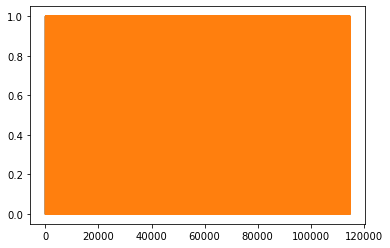

In [97]:
plt.plot(predict_label)
plt.plot(y_test.values)

In [98]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(predict_label,y_test)
print(accuracy)

0.901053787621264


0.8998596693076729


In [101]:
def amex_metric(y_true, y_pred):
    labels = np.transpose(np.array([y_true, y_pred]))
    labels = labels[labels[:, 1].argsort()[::-1]]
    weights = np.where(labels[:,0]==0, 20, 1)
    cut_vals = labels[np.cumsum(weights) <= int(0.04 * np.sum(weights))]
    top_four = np.sum(cut_vals[:,0]) / np.sum(labels[:,0])
    gini = [0,0]
    for i in [1,0]:
        labels = np.transpose(np.array([y_true, y_pred]))
        labels = labels[labels[:, i].argsort()[::-1]]
        weight = np.where(labels[:,0]==0, 20, 1)
        weight_random = np.cumsum(weight / np.sum(weight))
        total_pos = np.sum(labels[:, 0] *  weight)
        cum_pos_found = np.cumsum(labels[:, 0] * weight)
        lorentz = cum_pos_found / total_pos
        gini[i] = np.sum((lorentz - weight_random) * weight)
    return 0.5 * (gini[1]/gini[0] + top_four)

In [102]:
accuracy=amex_metric(predict_label,y_test.values[:,0])
print(accuracy)

0.5772675271123986


0.5717304564938761


# Submission section


# same process as train data: select labels and fill Nan

In [104]:
# labels_train.remove('target')
# labels_train.remove('B_std_mean')
labels_train.remove('std_mean_B_up')
labels_train.remove('count_B_up')
labels_train.remove('std_mean_B_down')
labels_train.remove('count_B_down')

labels_train.remove('std_mean_D_up')
labels_train.remove('count_D_up')
labels_train.remove('std_mean_D_down')
labels_train.remove('count_D_down')

df_test_selected=test_last_dates[labels_train].copy()
df_test_indexed=df_test_selected.set_index('customer_ID')

df_test_indexed.fillna(-1,inplace=True)

In [105]:
df_test_clean = add_std_D(df_test_indexed)
df_test_clean = add_std_B(df_test_indexed)

In [106]:
df_test_clean.shape

(924621, 194)

In [107]:
labels_train.append('std_mean_D_up')
labels_train.append('count_D_up')
labels_train.append('std_mean_D_down')
labels_train.append('count_D_down')

labels_train.append('std_mean_B_up')
labels_train.append('count_B_up')
labels_train.append('std_mean_B_down')
labels_train.append('count_B_down')

In [108]:
#Combine labels in df_test
for main_label in main_labels:
    for label in labels_train:
        if label not in ['customer_ID',main_label,'target']:
            obj_key=main_label+'_'+label
            cll=combine_obj[obj_key]
            cll.predict(data=df_test_clean)

In [109]:
df_test_clean.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,S_22_D_144_combined,S_22_D_145_combined,S_22_std_mean_D_up_combined,S_22_count_D_up_combined,S_22_std_mean_D_down_combined,S_22_count_D_down_combined,S_22_std_mean_B_up_combined,S_22_count_B_up_combined,S_22_std_mean_B_down_combined,S_22_count_B_down_combined
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.568930,0.121385,0.010779,1.009347,0.006923,0.149413,0.000396,0.003576,0.103745,0.007398,...,9999,10019,10000,10017,10097,10029,9999,10035,10098,10010
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.841177,0.126475,0.016562,1.009245,0.009715,0.112195,0.006192,0.011386,-1.000000,-1.000000,...,9999,10019,10000,10017,10097,10031,9999,10044,10098,10013
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.697522,0.002724,0.001484,0.810072,0.002620,0.166165,0.004888,0.015938,-1.000000,0.105303,...,9932,9920,9899,9924,9997,9924,9898,9934,9997,9909
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.513186,0.324828,0.149511,0.205678,0.002278,0.181200,0.005813,0.498516,-1.000000,0.211615,...,10036,10023,10000,10023,10098,10028,9999,10026,10098,10010
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.254478,0.768016,0.563603,0.038021,0.503154,0.168317,0.009480,0.830857,-1.000000,0.071884,...,9999,10019,10000,10020,10097,10032,9999,10008,10098,10054


In [110]:
prediction_test=classif.predict_proba(df_test_clean)

# create file. It add time to end of file to avoid overwriting previous results

In [111]:
submission_df=pd.DataFrame(data={'customer_ID':df_test_indexed.index,'prediction':prediction_test[:,1]})

In [112]:
import datetime
print(datetime.datetime.now())
submission_df.to_csv('submissions/submission_69.csv',index=False)
# submission_df.to_csv('submissions/submission_file_'+str(datetime.datetime.now()).replace(" ","").replace(':',"").replace('.',"")+'.csv',index=False)

2022-08-23 18:48:26.387947


In [113]:
submission_df.shape

(924621, 2)

In [114]:
submission_df.describe()

,prediction
count,924621.000000
mean,0.254252
std,0.363267
min,0.000013
25%,0.001618
50%,0.017178
75%,0.507474
max,0.999995


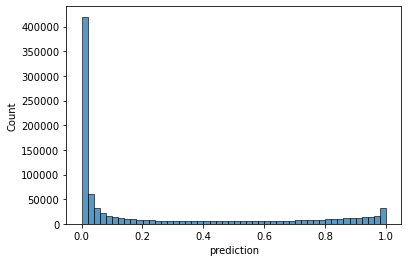

In [31]:
import seaborn as sns

sns.histplot(data=submission_df,x='prediction', binwidth=0.02)

plt.savefig('histplot_2.png', dpi=300, bbox_inches='tight', transparent=False)



In [129]:
sub = pd.read_csv('test_lgbm_baseline_5fold_seed42.csv')
sub.describe()

,prediction
count,924621.000000
mean,0.249383
std,0.345890
min,0.000055
25%,0.002865
50%,0.027004
75%,0.482741
max,0.999890


<AxesSubplot:xlabel='prediction', ylabel='Count'>

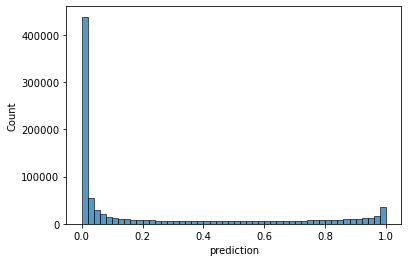

In [131]:
import seaborn as sns

sns.histplot(data=sub,x='prediction', binwidth=0.02)